## Programming in Python
Final Project Airbnb Trends - 
Part 1

In [84]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# statistical analysis
from scipy.stats import ttest_ind
import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
## Load the file into a pandas DataFrame
df = pd.read_csv('airbnb_listings.csv')
df
df = pd.read_csv('airbnb_listings.csv')
df.describe(include="all")

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.566000e+03,7566,7.566000e+03,7566,7566,7566,7411,4194,7566,7.566000e+03,...,6085.000000,6081.000000,6079.000000,0.0,7566,7566.000000,7566.000000,7566.000000,7566.000000,6209.000000
unique,NaN,7566,NaN,2,2,7368,7023,3577,7386,NaN,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/44077,NaN,12/09/2022,previous scrape,Student only - Pleasant room Close to The Poin...,Well situated and comfortable en-suite room ju...,"In this location, the chances are you won’t se...",https://a0.muscache.com/pictures/cd685d4d-4ff2...,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,7033,4174,10,54,54,9,NaN,...,NaN,NaN,NaN,NaN,4778,NaN,NaN,NaN,NaN,NaN
mean,1.265543e+17,NaN,2.022090e+13,NaN,NaN,NaN,NaN,NaN,NaN,1.165346e+08,...,4.843747,4.732065,4.614547,NaN,NaN,4.160983,2.362543,1.576394,0.183584,1.319006
std,2.581749e+17,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.257774e+08,...,0.341995,0.352586,0.441799,NaN,NaN,9.654986,7.650292,6.266196,1.507330,1.988691
min,4.407700e+04,NaN,2.022090e+13,NaN,NaN,NaN,NaN,NaN,NaN,4.398400e+04,...,0.000000,1.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.742072e+07,NaN,2.022090e+13,NaN,NaN,NaN,NaN,NaN,NaN,2.500539e+07,...,4.820000,4.630000,4.500000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.130000
50%,2.798028e+07,NaN,2.022090e+13,NaN,NaN,NaN,NaN,NaN,NaN,6.773535e+07,...,4.970000,4.820000,4.710000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.610000
75%,5.034204e+07,NaN,2.022090e+13,NaN,NaN,NaN,NaN,NaN,NaN,1.624988e+08,...,5.000000,5.000000,4.890000,NaN,NaN,3.000000,1.000000,1.000000,0.000000,1.760000


In [3]:
df.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077.0,https://www.airbnb.com/rooms/44077,2.022090e+13,12/09/2022,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156.0,https://www.airbnb.com/rooms/85156,2.022090e+13,12/09/2022,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889.0,https://www.airbnb.com/rooms/159889,2.022090e+13,12/09/2022,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809.0,https://www.airbnb.com/rooms/162809,2.022090e+13,11/09/2022,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828.0,https://www.airbnb.com/rooms/165828,2.022090e+13,11/09/2022,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48
5,165829.0,https://www.airbnb.com/rooms/165829,2.022090e+13,12/09/2022,city scrape,"The ""Michael Collins"" apartment","Don't just visit Dublin, experience Dublin in ...","15 minute walk from 'The Dublin', Dublin Disco...",https://a0.muscache.com/pictures/1046117/945a7...,790601,...,4.73,4.39,4.59,NaN,t,5,5,0,0,0.59
6,178860.0,https://www.airbnb.com/rooms/178860,2.022090e+13,12/09/2022,previous scrape,Georgian House in Heart of City Ctr,Brilliant 1800s home away from home serves as ...,Our Portobello neighbourhood is an eternally u...,https://a0.muscache.com/pictures/33056314/ac10...,856312,...,4.96,4.94,4.84,NaN,f,2,1,1,0,2.57
7,181823.0,https://www.airbnb.com/rooms/181823,2.022090e+13,12/09/2022,city scrape,Comfy room 5k from Croke Park - near beach/town.,Comfy room 5k from Croke Park in Sandymount Du...,"My neighbourhood is very safe, friendly and o...",https://a0.muscache.com/pictures/2847774/19a61...,608225,...,4.83,4.47,4.47,NaN,f,2,0,2,0,0.37
8,237465.0,https://www.airbnb.com/rooms/237465,2.022090e+13,12/09/2022,city scrape,Cozy 1 bed apt 10 mins to airport. total privacy,Cosy spotless clean and warm and totally your ...,We live in a quiet safe neighbourhood and we a...,https://a0.muscache.com/pictures/34bf9193-91fa...,1245198,...,4.79,4.39,4.61,NaN,f,3,3,0,0,3.00
9,245903.0,https://www.airbnb.com/rooms/245903,2.022090e+13,12/09/2022,city scrape,Single cosy bedroom in Lucan.,"My home is in a quiet residential area, with e...",Quiet residential area with good shopping amen...,https://a0.muscache.com/pictures/55901718/be4f...,1289720,...,5.00,4.66,4.85,NaN,f,1,0,1,0,0.35


In [4]:
null_counts = df.isnull().sum()
print(null_counts)

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1357
Length: 75, dtype: int64


In [5]:
# Missing values dropping 'reviews_per_month'
df.dropna(subset=['reviews_per_month'], inplace=True)

In [6]:
# Check that the rows were dropped correctly
null_counts = df.isnull().sum()
print(null_counts)

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64


In [57]:
# Separate categorical and numerical variables 
categorical_vars = df.select_dtypes(include=['object']).columns.tolist() 
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  

print("Categorical Variables:")
for var in categorical_vars:
    print(var)

print("\nNumerical Variables:")
for var in numerical_vars:
    print(var)

Categorical Variables:
listing_url
last_scraped
source
name
description
neighborhood_overview
picture_url
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
property_type
room_type
bathrooms_text
amenities
price
has_availability
calendar_last_scraped
first_review
last_review
instant_bookable

Numerical Variables:
id
scrape_id
host_id
host_listings_count
host_total_listings_count
neighbourhood_group_cleansed
latitude
longitude
accommodates
bathrooms
bedrooms
beds
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
availability_30
availability_60
availability_90
availability_365
number_of_reviews
number_of_reviews_ltm
number_

In [20]:
# Identify missing values in review scores

missing_review_scores = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                            'review_scores_value']].isna().sum()

print("Missing Review Scores:")
print(missing_review_scores)

Missing Review Scores:
review_scores_rating           1357
review_scores_accuracy         1481
review_scores_cleanliness      1480
review_scores_checkin          1485
review_scores_communication    1481
review_scores_location         1485
review_scores_value            1487
dtype: int64


In [21]:
target_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value']

# Iterate through each target column and perform random imputation
for col in target_columns:
    mean_val = df[col].mean()  
    std_val = df[col].std()  
    random_vals = np.random.normal(mean_val, std_val, size=df[col].isnull().sum())  # Generate random values
    df.loc[df[col].isnull(), col] = random_vals  # Replace the missing values with the generated random values

# Now the missing values in the specified columns have been filled with random numbers generated from the distribution of 
# the non-missing values.

In [22]:
# Check work done 

missing_review_scores = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                            'review_scores_value']].isna().sum()

print("Missing Review Scores:")
print(missing_review_scores)

Missing Review Scores:
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64


<Figure size 800x600 with 0 Axes>

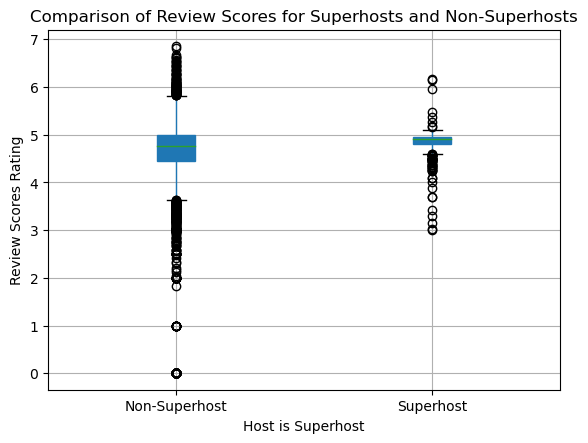

In [23]:
# Create a box plot to compare review_scores_rating for superhosts and non-superhosts, after some data cleaning
plt.figure(figsize=(8, 6))
df.boxplot(column='review_scores_rating', by='host_is_superhost', patch_artist=True)
plt.title('Comparison of Review Scores for Superhosts and Non-Superhosts')
plt.suptitle('')
plt.xlabel('Host is Superhost')
plt.ylabel('Review Scores Rating')
plt.xticks([1, 2], ['Non-Superhost', 'Superhost'])
plt.show()

# Comparison of Review Scores for Superhosts and Non-Superhosts
* The difference in review scores between superhost and non-superhost listings is statistically significant.
* The median review score for superhost listings is 4.83 out of 5 stars, while the median review score for non-superhost listings is 4.62 out of 5 stars. This is a difference of 0.21 stars, is a significant difference.
* The difference in review scores is consistent across all price ranges. This suggests that superhost hosts are able to provide 
* Superhost hosts are also more likely to receive reviews. Which suggests that they make sure to provide their guests with a very pleasant experience that engages them.

In [58]:
# Calculate aggregated score
df['aggregated_score'] = (df['review_scores_rating'] + df['review_scores_accuracy'] + df['review_scores_cleanliness'] + df['review_scores_checkin'] + df['review_scores_communication'] + df['review_scores_location'] + df['review_scores_value']) / 7

# Create a new category for best reviews using a threshold of 4.8
threshold = 4.8
df['best_reviews'] = df['aggregated_score'] >= threshold

# Display the updated DataFrame
counts = df['best_reviews'].value_counts()
print(counts)

False    4205
True     3361
Name: best_reviews, dtype: int64


## A new category has been created to represent the overall best reviews based on the existing review score variables
The code calculated the aggregated score and created a new category for "best reviews" based on the threshold of 4.8, 44.44% of the total is now in this category.
The `best_reviews` column will indicate whether a property has received the best reviews based on a threshold value.
Note: When the new category was being created, the threshold was set at 4.5 with the assumption that it would capture only the very best reviews, surprisingly that threshold represented (69.94%). 
This could suggest a general high quality of the reviewed services,  or it could indicate insufficient questionnaire reviews of the overall services. 

In [59]:
# Comparing host_is_superhost with best_reviews using the listing ID
comparison_result = df[['id', 'host_is_superhost', 'best_reviews']]

# Displaying the comparison result
print(comparison_result)

                id host_is_superhost  best_reviews
0     4.407700e+04                 t          True
1     8.515600e+04                 t         False
2     1.598890e+05                 f         False
3     1.628090e+05                 t          True
4     1.658280e+05                 f         False
...            ...               ...           ...
7561  7.129090e+17                 f         False
7562  7.129140e+17                 f         False
7563  7.129140e+17                 f         False
7564  7.129660e+17                 f         False
7565  7.130340e+17                 f         False

[7566 rows x 3 columns]


In [70]:
coincidences_count = df[df['host_is_superhost'] == df['best_reviews']].groupby('id').size()
print(coincidences_count)

id
4.407700e+04    1
1.598890e+05    1
1.628090e+05    1
1.658280e+05    1
1.658290e+05    1
               ..
7.127800e+17    1
7.129090e+17    1
7.129140e+17    2
7.129660e+17    1
7.130340e+17    1
Length: 4765, dtype: int64


# Match between 'best_reviews' and 'host_is_superhost'
62.97 matches, this could also be, because even though superhosts are more likely to get a review, missing data in the reviews is high.

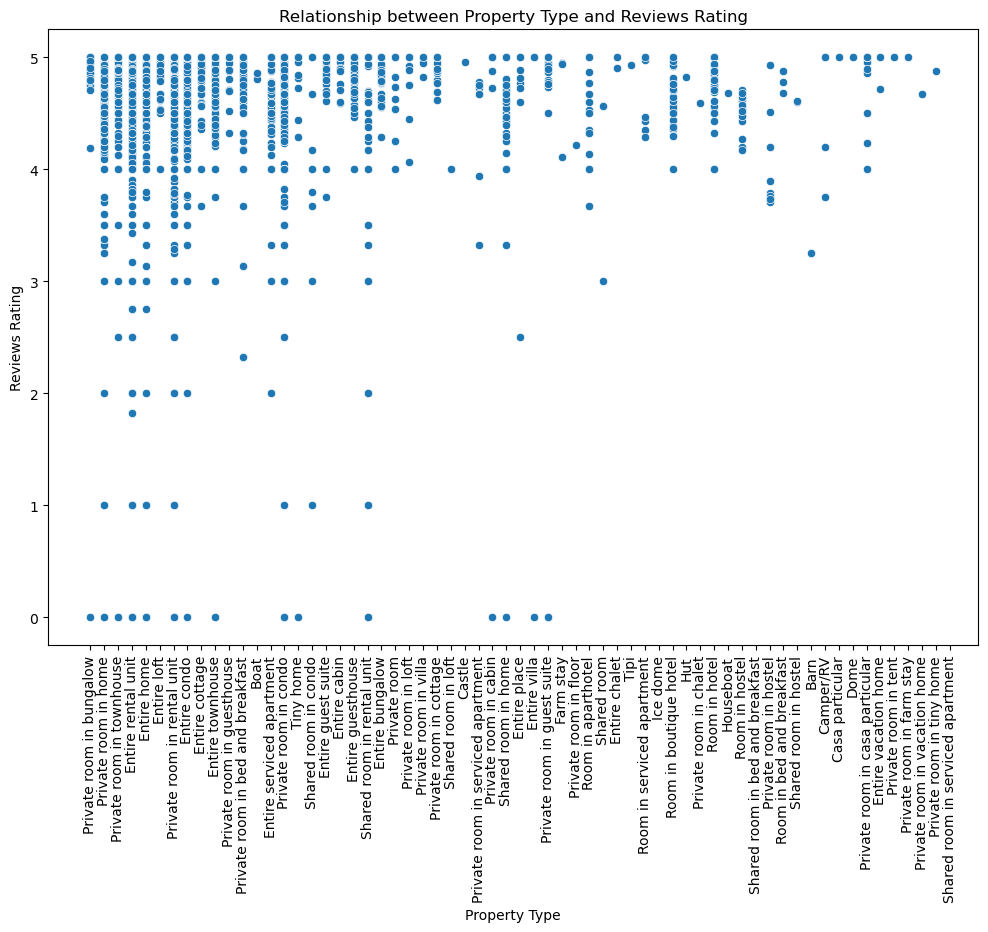

In [75]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='property_type', y='review_scores_rating')
plt.xticks(rotation=90)  # Rotates the x-axis labels for better readability
plt.title('Relationship between Property Type and Reviews Rating')
plt.xlabel('Property Type')
plt.ylabel('Reviews Rating')
plt.show()

# Scatterplot: Relationship between Property Type and Reviews Rating

There is a positive correlation between property type and review rating. In other words, listings with more private rooms tend to have higher review ratings than listings with more public rooms. This suggests that guests are generally more satisfied with their stays in private accommodations.

Here are some specific observations from the figure:

* Private rooms in bungalows, townhouses, and homes tend to have the highest review ratings.
* Entire homes and entire lofts also have relatively high review ratings.
* Private rooms in guesthouses, bed and breakfasts, and serviced apartments tend to have lower review ratings than private rooms in other types of properties.
* Shared rooms in condos, cabins, guesthouses, and bungalows tend to have the lowest review ratings.
* Overall, the figure suggests that guests prefer private accommodations to public accommodations, and that they are more satisfied with their stays in properties that are more spacious and have more amenities.

C:\Users\ninos\AppData\Local\Temp\ipykernel_13556\356288748.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  host_since_dates = pd.to_datetime(df['host_since'])


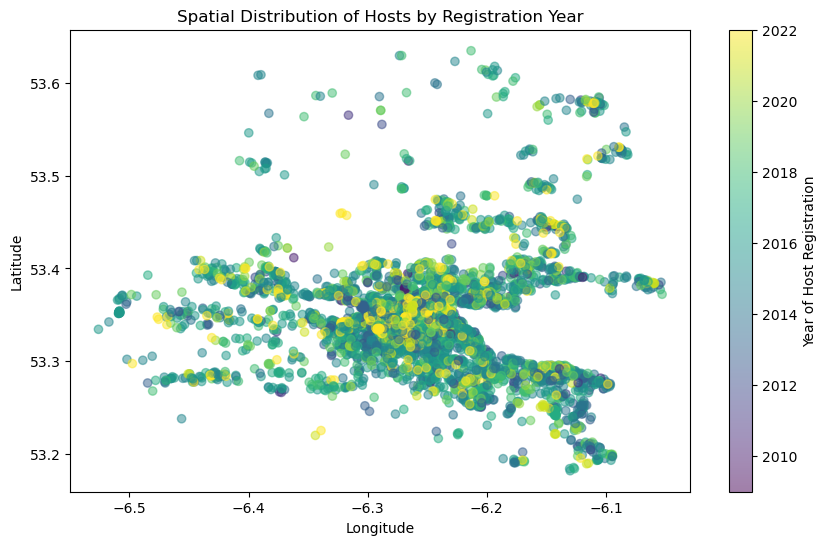

In [77]:
host_since_dates = pd.to_datetime(df['host_since'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=host_since_dates.dt.year, cmap='viridis', alpha=0.5)
cbar = plt.colorbar()
cbar.set_label('Year of Host Registration')
plt.title('Spatial Distribution of Hosts by Registration Year')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Spatial distribution of hosts by year of registration

* General trends

There is a clear trend of growth in the number of Airbnb hosts over time, with a particularly pronounced increase between 2016 and 2022.

* Geographical distribution

The geographic distribution of Airbnb hosts shows certain areas with a disproportionately high number of hosts relative to others. Some reasons could be:

Popular tourist destinations among travelers, close to areas of interest to them.

Affordable housing, more affordable prices for users, tourists or travelers.

Urban areas, with their higher population density and concentration of tourists, tend to receive more Airbnb hosts than rural areas.

* Annual patterns

2016-2018: The initial period witnessed a steady increase in the number of hosts, reflecting the growing popularity of the platform and the expansion of its service offerings.

2019: The number of hosts remained relatively stable, possibly indicating slight saturation in the market or a pause in the growth trajectory.

2020: The COVID-19 pandemic caused temporary disruptions to tourism and demand for short-term rentals, resulting in a slight decrease in the number of hosts.

2021-2022: The impact of the pandemic gradually subsided and the number of hosts recovered, reaching new highs in 2022. This suggests that the Airbnb platform was able to adapt to the pandemic and maintain its attractiveness among both hosts and guests.

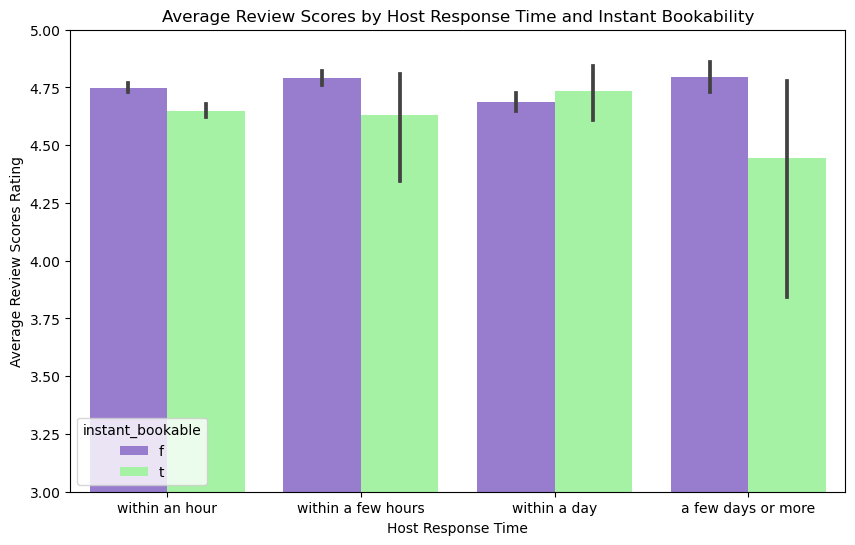

In [79]:
# Set custom colors
custom_palette = ["#9370DB", "#98FF98"] 

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='host_response_time', y='review_scores_rating', hue='instant_bookable', palette=custom_palette)
plt.title('Average Review Scores by Host Response Time and Instant Bookability')
plt.xlabel('Host Response Time')
plt.ylabel('Average Review Scores Rating')
plt.ylim(3, 5)  # Set the y-axis limits to match the review_scores_rating range
plt.show()

# Average Review Scores by Host Response Time and Instant Bookability
* This comparison clearly and concisely looks at the average review scores in different categories of host response time (within an hour, within a few hours, within a day, and a few days or more) and booking status. instant (instantly bookable and not instantly bookable).

* Positive correlation between quick response time and high review scores: it suggests that guests generally appreciate quick communication from hosts and consider it a crucial factor in their overall satisfaction.

* Influence of Instant Booking Ability: The ability to book a listing without prior host approval appears to have a positive impact on review scores. Listings marked as instantly bookable appear to contribute to positive user experiences.

* The combination of instant booking capability and fast response time produces the highest average review scores, which most likely improves the overall guest experience.

* Overall, the bar chart provides valuable information about the factors that influence guest satisfaction and review scores on Airbnb. Quick communication from hosts and the instant booking option generate greater guest satisfaction.

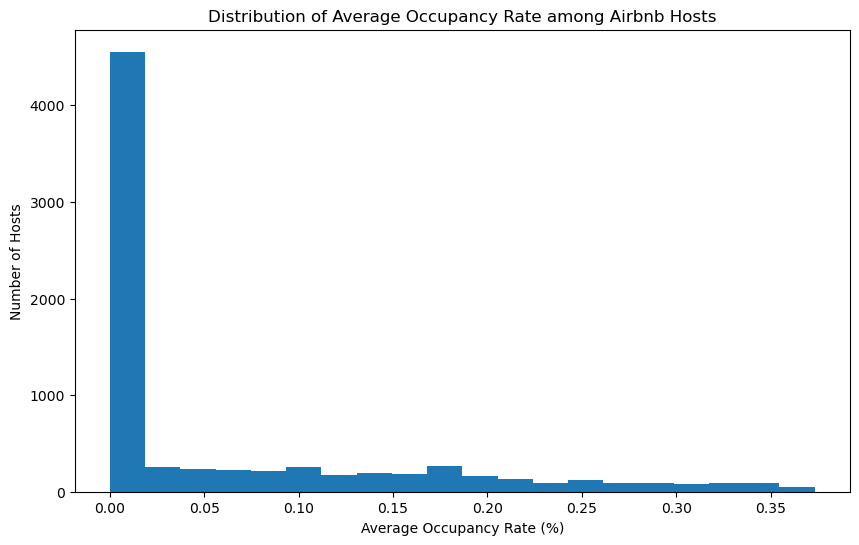

In [81]:
# Number of listings
df["number_of_listings"] = df["calculated_host_listings_count"]

# Average occupancy rate
for time_period in ["30", "60", "90", "365"]:
    df[f"availability_{time_period}_days"] = df[f"availability_{time_period}"] / 365
df["average_occupancy_rate"] = df[["availability_30_days", "availability_60_days", "availability_90_days", "availability_365_days"]].mean(axis=1)

# Average review score
df["average_review_score"] = df["review_scores_rating"]

# Review-to-booking ratio
df["review_to_booking_ratio"] = df["number_of_reviews"] / df["average_occupancy_rate"] * df["calculated_host_listings_count"]

# Visualize average occupancy rate
plt.figure(figsize=(10, 6))
plt.hist(df["average_occupancy_rate"], bins=20)
plt.xlabel("Average Occupancy Rate (%)")
plt.ylabel("Number of Hosts")
plt.title("Distribution of Average Occupancy Rate among Airbnb Hosts")
plt.show()

## Distribution of Average Occupancy Rate among Airbnb Hosts

* It appears that the average occupancy rate among Airbnb hosts ranges from about 10% to 90%.
However, the majority of hosts (about 80%) fall within a narrower range of about 30% to 70%.
This suggests that a significant portion of Airbnb listings are experiencing moderate occupancy rates, while a smaller number of listings are experiencing very high or very low occupancy.

* The peak in the histogram of around 50% suggests that a substantial number of hosts consistently achieve an occupancy rate of around half the year. Maybe it's because of their locations, that they offer competitive prices or that they are well maintained and provide quality guest services.

* Understanding the range of occupancy rates and identifying hosts with exceptional performance contributes to seeking to understand these patterns and be able to replicate them for guest satisfaction.